# S17 T02 Base de dades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector
from random import seed
from random import randint

import matplotlib as mpl


## Exercici 1
Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python


In [2]:
# Connect to MySQL
mydb = mysql.connector.connect(
  host="localhost",
  user="cecilia",
  password="cecilia"
)

print(mydb)


In [3]:
# Create a database
mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE IF NOT EXISTS schoolGrades")

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  if x[0] == 'schoolgrades':
    print('Succesfull creation of database')



Succesfull creation of database


In [4]:
# Connect to the new database
mydb = mysql.connector.connect(
  host="localhost",
  user="cecilia",
  password="cecilia",
  database="schoolgrades"
)

In [5]:
mycursor = mydb.cursor()

# Create tables 

mycursor.execute("CREATE TABLE IF NOT EXISTS students (studentID INT NOT NULL AUTO_INCREMENT, name CHAR(55), surname CHAR(55), PRIMARY KEY (studentID))")

mycursor.execute("CREATE TABLE IF NOT EXISTS subjects (subjectID INT NOT NULL AUTO_INCREMENT, subjName VARCHAR(255), PRIMARY KEY (subjectID))")

                 
mycursor.execute("CREATE TABLE IF NOT EXISTS grades (studentID INT, subjectID INT, grade INT, FOREIGN KEY (studentID) REFERENCES students(studentID), FOREIGN KEY (subjectID) REFERENCES subjects(subjectID))")
    

In [6]:
# See what´s in the student´s table
mycursor.execute("SELECT * FROM students")
myresult = mycursor.fetchall()

for x in myresult:
  print(x)

In [7]:
# Insert data into the table
sql = "INSERT INTO students (name, surname) VALUES (%s, %s)"
datos = [('Jorge', 'Perez'), ('Maria', 'Perez'), ('Estela', 'Fernandez'), ('Juan', 'Rodriguez')]
#datos = [('Maria', 'Perez'), ('Estela', 'Fernandez')]


for persona in datos:
    mycursor.execute(sql, persona)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


In [8]:
# Insert data into the table
sql = "INSERT INTO subjects (subjName) VALUES (%s)"
datos = [['math'], ['history'], ['art'], ['english'], ['geography'], ['literature']]
#datos = [['math'], ['history']]


for subj in datos:
    mycursor.execute(sql, subj)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


In [9]:
# Display the data from the tables
mycursor.execute("SELECT * FROM students")
estudiantes = mycursor.fetchall()

for x in estudiantes:
  print(x)

mycursor.execute("SELECT * FROM subjects")
temas = mycursor.fetchall()

for x in temas:
  print(x)



(1, 'Jorge', 'Perez')
(2, 'Maria', 'Perez')
(3, 'Estela', 'Fernandez')
(4, 'Juan', 'Rodriguez')
(1, 'math')
(2, 'history')
(3, 'art')
(4, 'english')
(5, 'geography')
(6, 'literature')


In [10]:
# Insert data into the last table
sql = "INSERT INTO grades (studentID, subjectID, grade) VALUES (%s, %s, %s)"
seed(1)

for student in estudiantes:
    for subject in temas:
        data = ((student[0], subject[0], randint(4, 10)))
        mycursor.execute(sql, data)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


## Exercici 2
Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.


In [11]:
# Obtain the column names from students
mycursor.execute("SHOW COLUMNS FROM students")
cols1= mycursor.fetchall()

cols = []
for x in cols1:
    cols.append(x[0])
    
print(cols)

['studentID', 'name', 'surname']


In [12]:
df_estudiantes = pd.DataFrame(data=estudiantes, columns=cols )
print(df_estudiantes)

   studentID    name    surname
0          1   Jorge      Perez
1          2   Maria      Perez
2          3  Estela  Fernandez
3          4    Juan  Rodriguez


In [13]:
# Obtain every student with the grades
mycursor.execute("SELECT students.studentID, students.name, students.surname, subjects.subjName, grades.grade FROM grades, students, subjects WHERE students.studentID = grades.studentID and subjects.subjectID = grades.subjectID")
notas= mycursor.fetchall()

for x in notas:
  print(x)

(1, 'Jorge', 'Perez', 'math', 5)
(1, 'Jorge', 'Perez', 'history', 8)
(1, 'Jorge', 'Perez', 'art', 10)
(1, 'Jorge', 'Perez', 'english', 10)
(1, 'Jorge', 'Perez', 'geography', 10)
(1, 'Jorge', 'Perez', 'literature', 4)
(2, 'Maria', 'Perez', 'math', 6)
(2, 'Maria', 'Perez', 'history', 4)
(2, 'Maria', 'Perez', 'art', 7)
(2, 'Maria', 'Perez', 'english', 10)
(2, 'Maria', 'Perez', 'geography', 7)
(2, 'Maria', 'Perez', 'literature', 7)
(3, 'Estela', 'Fernandez', 'math', 9)
(3, 'Estela', 'Fernandez', 'history', 7)
(3, 'Estela', 'Fernandez', 'art', 10)
(3, 'Estela', 'Fernandez', 'english', 5)
(3, 'Estela', 'Fernandez', 'geography', 4)
(3, 'Estela', 'Fernandez', 'literature', 7)
(4, 'Juan', 'Rodriguez', 'math', 4)
(4, 'Juan', 'Rodriguez', 'history', 10)
(4, 'Juan', 'Rodriguez', 'art', 7)
(4, 'Juan', 'Rodriguez', 'english', 7)
(4, 'Juan', 'Rodriguez', 'geography', 8)
(4, 'Juan', 'Rodriguez', 'literature', 10)


In [14]:
df = pd.DataFrame(data= notas, columns=('stID', 'name', 'surname', 'subject', 'grade'))
print(df)

    stID    name    surname     subject  grade
0      1   Jorge      Perez        math      5
1      1   Jorge      Perez     history      8
2      1   Jorge      Perez         art     10
3      1   Jorge      Perez     english     10
4      1   Jorge      Perez   geography     10
5      1   Jorge      Perez  literature      4
6      2   Maria      Perez        math      6
7      2   Maria      Perez     history      4
8      2   Maria      Perez         art      7
9      2   Maria      Perez     english     10
10     2   Maria      Perez   geography      7
11     2   Maria      Perez  literature      7
12     3  Estela  Fernandez        math      9
13     3  Estela  Fernandez     history      7
14     3  Estela  Fernandez         art     10
15     3  Estela  Fernandez     english      5
16     3  Estela  Fernandez   geography      4
17     3  Estela  Fernandez  literature      7
18     4    Juan  Rodriguez        math      4
19     4    Juan  Rodriguez     history     10
20     4    J

In [15]:
#mycursor.execute("DROP TABLE grades") 
#mycursor.execute("DROP TABLE students") 
#mycursor.execute("DROP TABLE subjects") 
mycursor.execute("DROP DATABASE schoolgrades")

## Exercici 3
Genera algun gràfic que resumeixi les dades. 

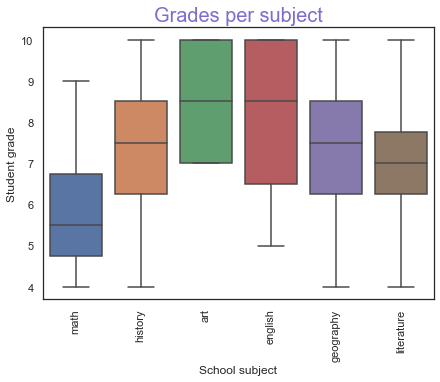

In [36]:
# Make a boxplot
plt.figure(figsize =(7,5))
sns.boxplot(x=df["subject"], y=df["grade"])
plt.title('Grades per subject', fontsize=20, color='#6146C6', alpha=0.8)
plt.xlabel("School subject")
plt.ylabel("Student grade")
plt.xticks(rotation='vertical')
#plt.ylim(1,10)
plt.show()

The best grades are in art and english.

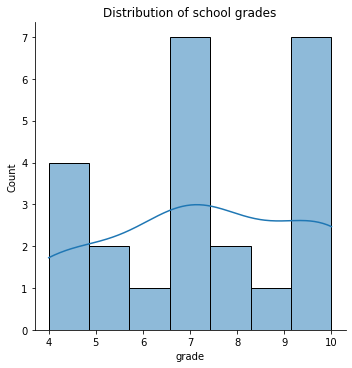

In [29]:
sns.displot(df.grade, bins=7 , label = notas, kde='True')
plt.title('Distribution of school grades')
    
plt.show()

The most common grades are 7 and 10. 

In [51]:
# find out the average per student
prom = pd.DataFrame(df.groupby('stID').agg({'grade':[np.mean]}))


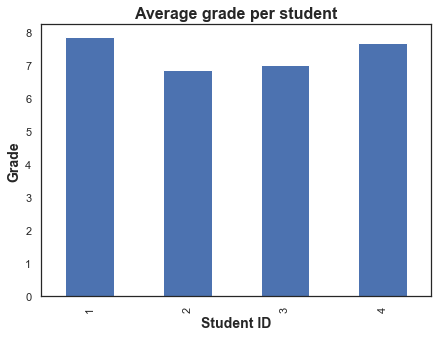

In [53]:
#plot the median values of ArrDelay, DepDelay and AirTime for each airline
fig = prom.plot(kind='bar', figsize= (7,5), legend=False)
fig.set_title('Average grade per student', fontsize=16, weight="bold")
fig.set_xlabel("Student ID", fontsize=14, weight = "bold")
fig.set_ylabel('Grade',  fontsize=14, weight="bold")
plt.show()

The student with studentID = 1 is the one with best grades.